# Demonstration of various configurations of the universe

Chosen method: <b><i> Method 2</i></b>

Imports and variables:

In [20]:
import numpy as np
import matplotlib.pyplot as plt

TAU = np.pi*2
chords_to_draw = 100

# size of the 'universe'
r = 100

Define necessary methods:

In [21]:
# Returns Boolean
def intersects(line,circles):
    x1,x2 = line[0][0], line[1][0]
    y1,y2 = line[0][1], line[1][1]
    
    for circle in circles:
        center = circle.center
        radius = circle.radius

        gradient = (y2-y1)/(x2-x1)
        intercept = y2-(gradient*x2)
        
        # equation for closest approach to a point (circle center) given a line equation
        distance = (np.abs(gradient*center[0] - center[1] + intercept))/(np.sqrt(gradient**2 + 1))
        
        if distance <= radius:
            # first time it detects an intersect, exit the loop as the chord is invalid
            return True
    
    # if no intersect is detected
    return False

In [22]:
# Returns Boolean
def draw_chord(p1,p2,c1,thickness):
    x1,x2 = p1[0], p2[0]
    y1,y2 = p1[1], p2[1]

    if intersects((p1,p2), c1):
        plt.plot([x1,x2],[y1,y2],'red',linewidth=thickness)
        return True
    else:
        plt.plot([x1,x2],[y1,y2],'green',linewidth=thickness)
        return False

In [23]:
# Return pair of floats

def get_coords(r,theta):
    return r * np.cos(theta), r * np.sin(theta)

def get_chord(x,y,r,angle):
    chord_length = np.sqrt(r**2 - (np.sqrt(x**2 + y**2))**2)
    p1 = x + chord_length * np.cos(angle), y + chord_length * np.sin(angle)
    p2 = x - chord_length * np.cos(angle), y - chord_length * np.sin(angle)

    return p1,p2

Generate random chords:

In [24]:
def generate_chords(chords_to_draw):
    chords = []

    for i in range(chords_to_draw):
        # generate random radius angle
        angle = np.random.uniform() * TAU
        x, y = get_coords(r,angle)

        # subtract 90 degrees (pi/2) to get perpendicular
        angle_perp = angle - np.pi/2

        # choose a random radius length
        r_length = np.random.uniform() * r
        x, y = get_coords(r_length, angle)

        # generates chord perpendicular to end of partial radius
        p1, p2 = get_chord(x,y,r,angle_perp)

        chords.append((p1,p2))
    return chords

Simulate model and store data:

In [25]:
universe = plt.Circle((0,0), r, color='black', fill=False)

results = []
num_chords = 10000000
num_tests = 15
increment = 40/num_tests

for i in range(num_tests):
    print(round(i/num_tests * 100,2), "percent complete")
    bodies = []
    body_data = [((0, 10 + (increment)*i),10), 
                 ((0,-10 - (increment)*i),10)]

    for d in body_data:
        bodies.append(plt.Circle(d[0],d[1],color='blue',fill=False))

    total = num_chords
    chords = generate_chords(num_chords)

    for i in range(len(chords)):
        if intersects((chords[i][0],chords[i][1]),bodies):
            total -= 1

    valid = total
    invalid = num_chords-total

    results.append((valid,invalid,np.log(valid/num_chords),round(bodies[0].center[1],2) - round(bodies[1].center[1],3)))

entropy_distance_data = []
for val in results:
    entropy_distance_data.append((val[2],val[3]))

0.0 percent complete
6.67 percent complete
13.33 percent complete
20.0 percent complete
26.67 percent complete
33.33 percent complete
40.0 percent complete
46.67 percent complete
53.33 percent complete
60.0 percent complete
66.67 percent complete
73.33 percent complete
80.0 percent complete
86.67 percent complete
93.33 percent complete


Write data to external file for use in plotting

In [26]:
data_to_write = []
for d in entropy_distance_data:
    data_to_write.append(d[0])
    data_to_write.append(d[1])

While overwriting one file with current dataset, append to file with all previous datasets too

In [27]:
entropy_file = open("entropy_data.txt", 'w')
dataset = open("datasets.txt",'a')
for d in data_to_write:
    entropy_file.write(str(d)+',')
    dataset.write(str(d)+',')
entropy_file.close()
dataset.write("\n\n")
dataset.close()

Generate image showing the universe and the bodies:

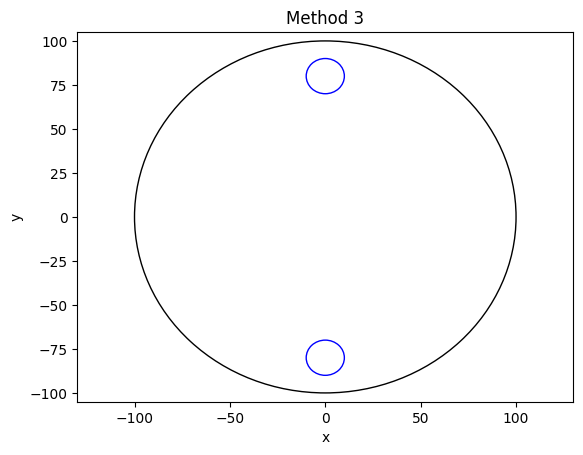

In [28]:
universe = plt.Circle((0,0), r, color='black', fill=False)

bodies = []
body_data = [((0,80),10), 
            ((0,-80),10)]


fig, ax = plt.subplots()
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_title("Method 3")
ax.set_xlim(-130,130), ax.set_ylim(-105,105)
ax.add_artist(universe)
for d in body_data:
    ax.add_artist(plt.Circle(d[0],d[1],color='blue',fill=False))